# Сравнение времени работы алгоритмов поиска паросочетаний и поиска маскимальных независимых множеств

В этой работе мы проведем тестирование работы алгоритмов поиска паросочетаний и поиска независимых множеств, встроенных в библиотеку __networkx__, на примере случайных обычных графов и случайных двудольных графов с последовательно изменяющейся плотностью и числом вершин

## Импорт библиотек

In [2]:
# imports
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import time


# Пример работы алгоритмов

Для начала ознакомимся с тем, как работают алгоритмы maximum_matching и maximal_independent_set на графическом примере.

Случайный обычный граф:

{(13, 14), (3, 4), (1, 11), (7, 10), (0, 2), (8, 9), (5, 6), (12, 15)}


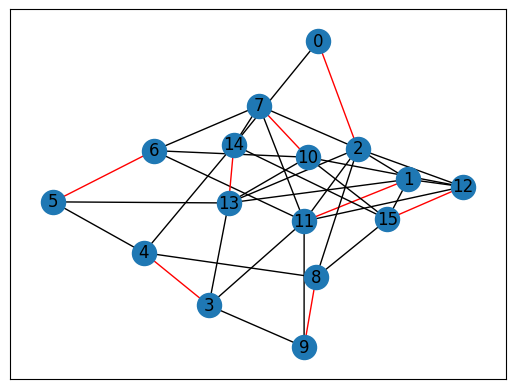

In [3]:
n = 4 * 4  # Число вершин
p = 0.3  # Плотность графа
G = nx.fast_gnp_random_graph(n, p)  # Создаем граф

matchings = nx.maximal_matching(G)  # Вызываем алгоритм
print(matchings)
# Красим ребра, помеченные алгоритмом, в красный цвет
edge_color_list = ["black"]*len(G.edges)
for i, edge in enumerate(G.edges()):
    if edge in matchings:
        edge_color_list[i] = 'red'

# Отображаем граф
nx.draw_networkx(
    G,
    edge_color=edge_color_list
)


[8, 5, 7, 0, 1, 3] 6


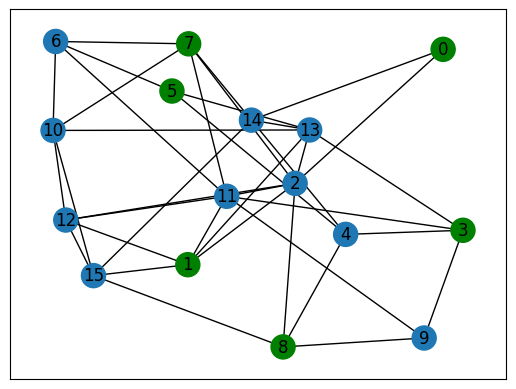

In [4]:
n = 4 * 4  # Число вершин
p = 0.3  # Плотность графа
ind_set = nx.maximal_independent_set(G)

print(ind_set, len(ind_set))

# Красим вершины независимого множества в зеленый цвет
color_map = []
for node in G:
    if node in ind_set:
        color_map.append('green')
    else:
        color_map.append("#1f78b4")

nx.draw_networkx(
    G,
    node_color=color_map,
)


Случайный двудольный граф:

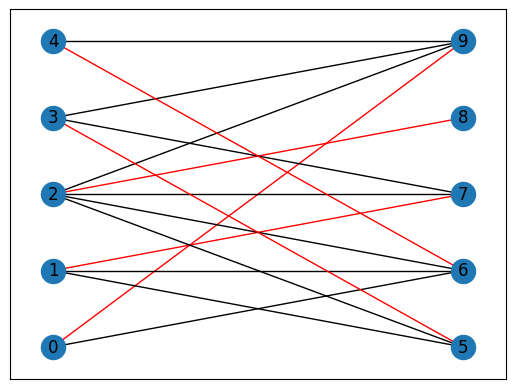

In [5]:
n = 5  # Число вершин одной доли
p = 0.6  # Плотность графа
B = bipartite.gnmk_random_graph(n, n, n * n * p)  # Создаем граф
matchings = nx.bipartite.maximum_matching(B)  # Вызываем алгоритм

# Красим ребра, помеченные алгоритмом, в красный цвет
edge_color_list = ["black"]*len(B.edges)
for i, edge in enumerate(B.edges()):
    if edge[0] in matchings.keys():
        if matchings[edge[0]] == edge[1]:
            edge_color_list[i] = 'red'

# Отображаем граф
nx.draw_networkx(
    B,
    pos=nx.bipartite_layout(B, np.arange(0, n, 1)),
    edge_color=edge_color_list
)


[3, 7, 0, 4, 1] 5


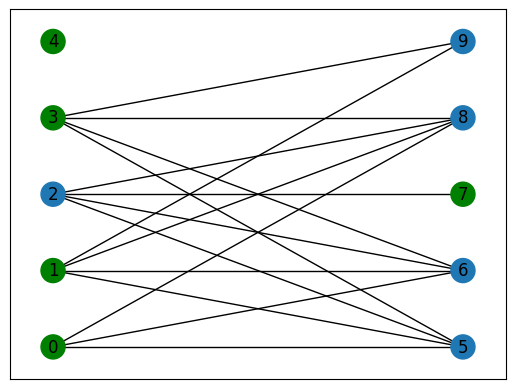

In [6]:
n = 5
p = 0.6
B = bipartite.gnmk_random_graph(n, n, n * n * p)
ind_set = nx.maximal_independent_set(B)

print(ind_set, len(ind_set))

# Красим вершины независимого множества в зеленый цвет
color_map = []
for node in B:
    if node in ind_set:
        color_map.append('green')
    else:
        color_map.append("#1f78b4")

nx.draw_networkx(
    B,
    node_color=color_map,
    pos=nx.bipartite_layout(B, np.arange(0, n, 1))
)


## Анализ алгоритма поиска паросочетаний

In [7]:
def test_regular_matching_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for d in density_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(n_vertices, d)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_matching(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_matching(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [8]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 2000
time_array, edges_array = test_regular_matching_density(
    n_vertices, densities, 100)


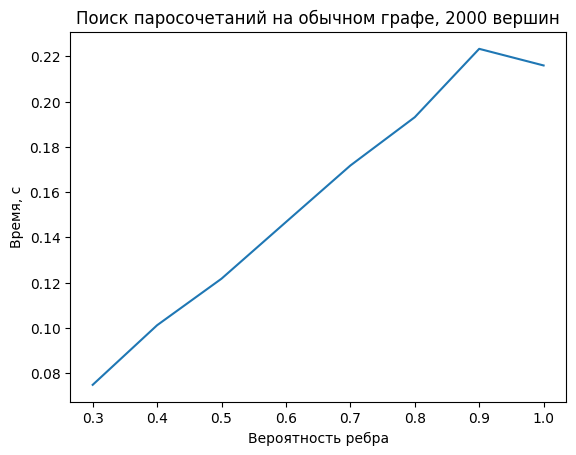

In [9]:
plt.title('Поиск паросочетаний на обычном графе, {} вершин'.format(n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array)
plt.show()


In [10]:
def test_regular_matching_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for v in vertices_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(v, density)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_matching(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_matching(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [11]:
density = 0.5
vertices_array = np.arange(100, 5001, 100)
time_array, edges_array = test_regular_matching_vertices(
    vertices_array, density, 100)


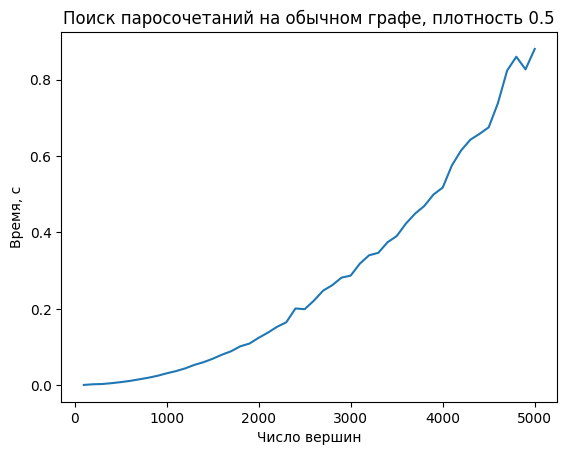

In [12]:
plt.title('Поиск паросочетаний на обычном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array)
plt.show()


In [13]:
def test_bipartite_matching_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for d in density_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(
                n_vertices, n_vertices, n_vertices * n_vertices * d)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.bipartite.maximum_matching(B)
        start = time.perf_counter()  # Засекаем время
        nx.bipartite.maximum_matching(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [75]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 1000
time_array, edges_array = test_bipartite_matching_density(
    n_vertices, densities, 100)


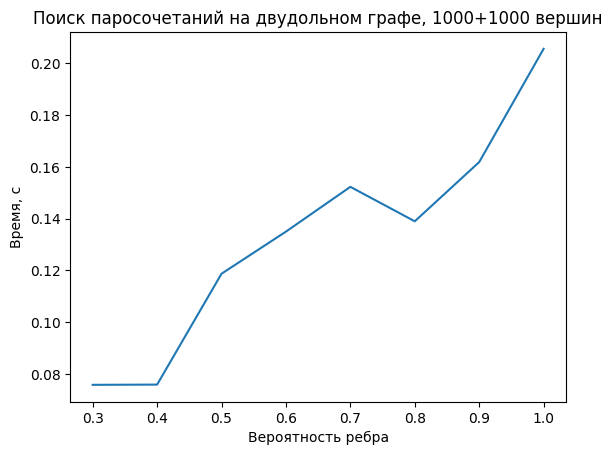

In [76]:
plt.title('Поиск паросочетаний на двудольном графе, {}+{} вершин'.format(n_vertices, n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array)
plt.show()


In [28]:
def test_bipartite_matching_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for v in vertices_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(v, v, v * v * density)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.bipartite.maximum_matching(B)
        start = time.perf_counter()  # Засекаем время
        nx.bipartite.maximum_matching(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [29]:
density = 0.5
vertices_array = np.arange(100, 1001, 100)
time_array, edges_array = test_bipartite_matching_vertices(
    vertices_array, density, 100)


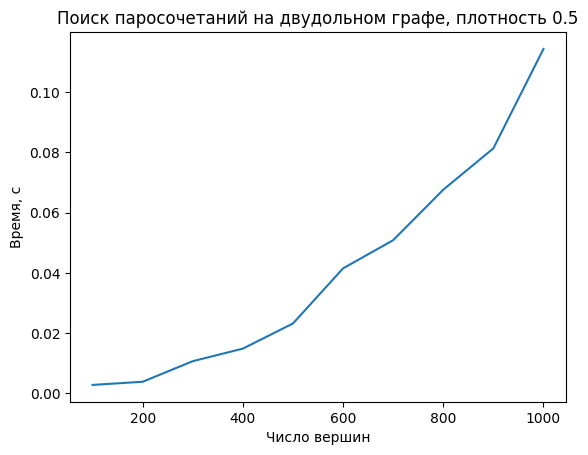

In [30]:
plt.title('Поиск паросочетаний на двудольном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array)
plt.show()


## Анализ алгоритма поиска максимального независимого множества

In [31]:
def test_regular_independent_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for d in density_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(n_vertices, d)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [73]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 2000
time_array, edges_array = test_regular_independent_density(
    n_vertices, densities, 100)


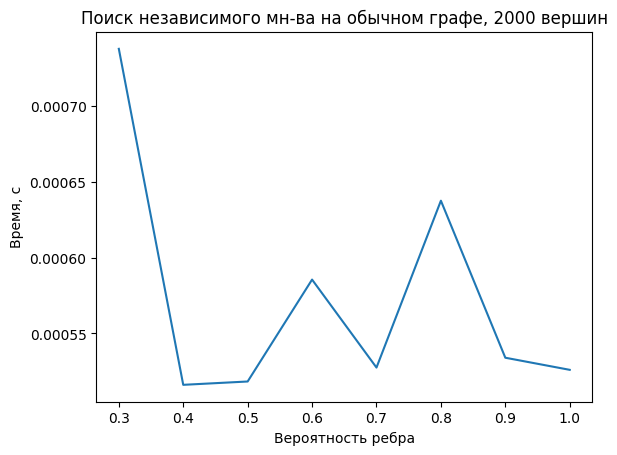

In [74]:
plt.title('Поиск независимого мн-ва на обычном графе, {} вершин'.format(n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array)
plt.show()


In [34]:
def test_regular_independent_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    G = 0

    for v in vertices_array:
        for _ in range(max_iter):
            G = nx.fast_gnp_random_graph(v, density)
            if (nx.is_connected(G)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(G)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(G)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [37]:
density = 0.5
vertices_array = np.arange(100, 5001, 100)
time_array, edges_array = test_regular_independent_vertices(
    vertices_array, density, 100)


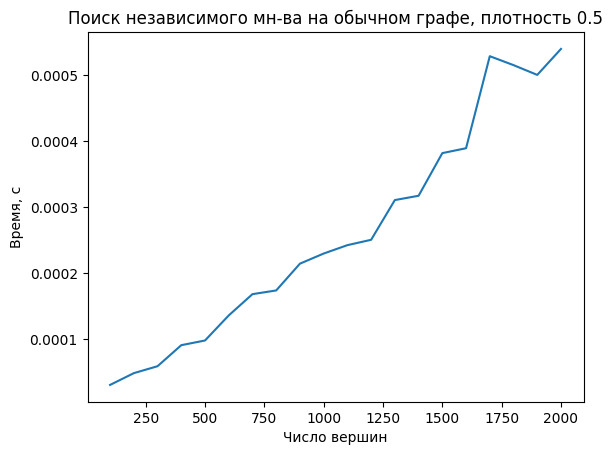

In [38]:
plt.title('Поиск независимого мн-ва на обычном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array)
plt.show()


In [39]:
def test_bipartite_independent_density(n_vertices, density_array, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for d in density_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(
                n_vertices, n_vertices, n_vertices * n_vertices * d)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(B)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [65]:
densities = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_vertices = 300
time_array, edges_array = test_bipartite_independent_density(
    n_vertices, densities, 100)


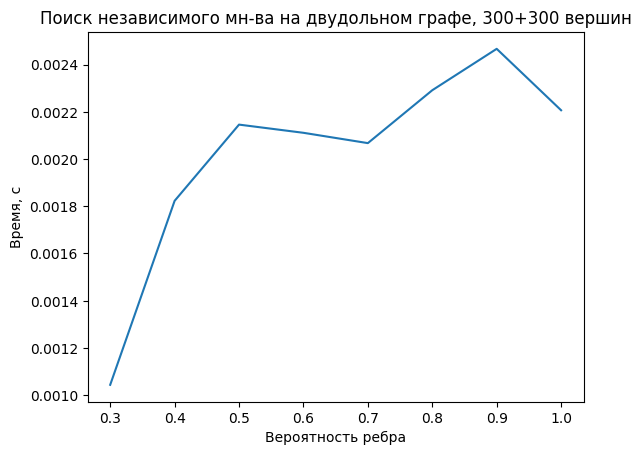

In [66]:
plt.title('Поиск независимого мн-ва на двудольном графе, {}+{} вершин'.format(n_vertices, n_vertices))
plt.xlabel('Вероятность ребра')
plt.ylabel('Время, с')
plt.plot(densities, time_array)
plt.show()


In [42]:
def test_bipartite_independent_vertices(vertices_array, density, max_iter):
    time_array = []
    edges_array = []

    B = 0

    for v in vertices_array:
        for _ in range(max_iter):
            B = bipartite.gnmk_random_graph(v, v, v * v * density)
            if (nx.is_connected(B)):
                break

        # Разогревочный пробег алгоритма
        nx.maximal_independent_set(B)
        start = time.perf_counter()  # Засекаем время
        nx.maximal_independent_set(B)  # и пытаемся вызвать алгоритм
        end = time.perf_counter()

        # Добавляем засеченное время в массив
        time_array.append(end - start)
        # Добавляем число вершин в массив
        edges_array.append(len(G.edges))

    return time_array, edges_array


In [50]:
density = 0.5
vertices_array = np.arange(100, 3001, 100)
time_array, edges_array = test_bipartite_independent_vertices(
    vertices_array, density, 100)


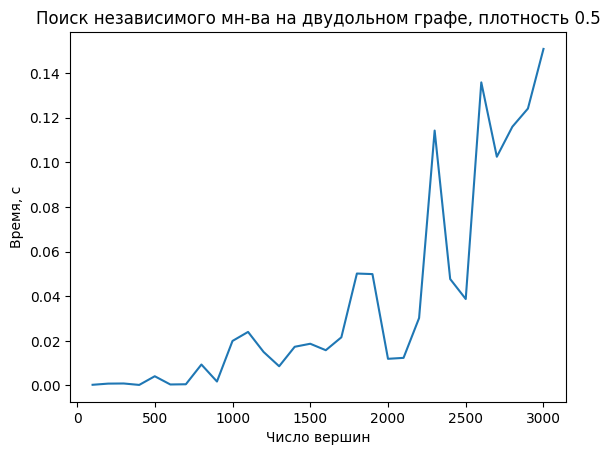

In [51]:
plt.title(
    'Поиск независимого мн-ва на двудольном графе, плотность {}'.format(density))
plt.xlabel('Число вершин')
plt.ylabel('Время, с')
plt.plot(vertices_array, time_array)
plt.show()
